**Team Members:**<br>

1- Maha Magdi AbdelHamid Hassan <br>
2- Ahmed Reda Zalat<br>
3- Ahmed Osama Abdellatif Alkadi

**ITI Alexandria Branch**<br>

## Quantum Clustering


## TASK!

Implement a quantum clustering algorithm using the above steps to cluster a dataset of your own choice.
- *I would prefer two clusters only but do as you wish.*
- Use Numpy only.
- Before each cell I want a small description of what is happening.
- Write your code in functions.
- Each function should execute one operation only.
- Annotate your code and document it.


#### Import important libraries

In [1]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex
from qiskit.circuit.library import RYGate

## The K-means functions 

### Initialize the state of a qubit to a specific quantum state.

In [2]:
def init_state() -> np.ndarray:

  """
  Returns:
  - state (np.ndarray): A 2D numpy array representing the state vector of the qubit,
    where |0⟩ = [1, 0]^T (column vector).

    
  This function initializes the state of a qubit to a specific quantum state.
  By default, it initializes the qubit to the |0⟩ state.

  """

  state = np.array([[1], [0]])

  return state


### Encode input data into quantum states using RY gate operations.

In [3]:

def encode_data(data: np.ndarray) -> np.ndarray:
    """
    Encode the input data using quantum gates.

    Parameters:
    - data: Input data to be encoded.

    This function encodes each data point in the input `data` into a quantum state
    using RX gate operations. Each data point is used to specify the rotation angle 
    of an RX gate, and the resulting quantum state is obtained by applying the RX gate 
    to the initialized ground state (|0⟩).

    The encoded quantum states are collected and returned as a numpy array of shape (n_points, 2),
    where each row corresponds to a quantum state represented by a 2D vector.

    Returns:
    - evovled_state.real: Encoded data represented as a numpy array.
    """

    # Initialize the quantum state
    state = init_state()

    # Initialize an empty list to store the evolved quantum states
    evolved_state = []

    # Iterate over each data point
    for i in data:
        # Apply the quantum gate operation based on the data point
        rx = RYGate(float(i)).to_matrix()

        # Evolve the quantum state using the gate operation
        evovled_s = rx @ state

        # Append the evolved quantum state to the list
        evolved_state.append(evovled_s)

    # Reshape the list of evolved states into a numpy array
    # and extract the real part of the complex numbers
    evovled_state = np.array(evolved_state).reshape(-1, 2)

    # Return the real part of the evolved quantum state as the encoded data
    return evovled_state.real


### Initialize centroids for K-means clustering algorithm.

In [4]:

def KmeansInitCentroids(data: np.ndarray, clusters: int, r: int = 45) -> np.ndarray:
    """
    Initialize centroids for K-means clustering.

    Parameters:
    - data: Input data array of shape (n_samples, n_features).
    - clusters: Number of clusters to generate centroids for.
    - r: Random seed for reproducibility. Default is 45.

    Returns:
    - centroids: Array of centroids with shape (clusters, n_features).
    """

    # Set the random seed for reproducibility
    np.random.seed(r)

    # Generate random indices to select initial centroids
    randidx = np.random.choice(data.shape[0], clusters, replace=False)

    # Select data points corresponding to the random indices as centroids
    centroids = data[randidx]

    return centroids


### Calculate the fidelity (inner product) between two quantum states and return maximum fidelity

In [5]:

def CalculateFidelity(data: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    """
    Calculate fidelity scores and assign labels to data points based on centroid proximity.

    Parameters:
    - data: Input data array of shape (n_samples, n_features).
    - centroids: Array of centroids with shape (n_clusters, n_features).

    Returns:
    - labels: Array of labels assigned to each data point based on centroid proximity.
    """

    # Compute the inner product between data points and centroids
    inner_product = np.dot(data, centroids.T).real

    # Calculate fidelity scores based on absolute squared inner product
    fidelity = np.abs(inner_product) ** 2

    # Assign labels to data points based on the index of the maximum fidelity score
    labels = np.argmax(fidelity, axis=1)

    return labels


###  Compute new centroids by computing the means of the data points assigned to each centroid.

In [6]:

def UpdateCentroids(data: np.ndarray, labels: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    """
    Update centroids based on assigned labels.

    Parameters:
    - data: Input data array of shape (n_samples, n_features).
    - labels: Array of cluster labels for each data point.
    - centroids: Array of current centroids with shape (n_clusters, n_features).

    Returns:
    - n_centroids: Updated centroids based on the mean of data points in each cluster,
                   with shape (n_clusters, n_features).
    """

    # Initialize an array to store the new centroids
    n_centroids = np.zeros((centroids.shape[0], data.shape[1]))

    # Iterate over each centroid
    for i in range(centroids.shape[0]):
        # Calculate the mean of data points assigned to the current centroid
        n_centroids[i] = np.mean(data[(labels == i)], axis=0)

    return n_centroids


### Perform K-means clustering algorithm on the given dataset.

In [7]:

def Kmeans(data: np.ndarray, clusters: int, max_iters: int, r: int = 42) -> (np.ndarray, np.ndarray):
    """
    Perform K-means clustering algorithm.

    Parameters:
    - data: Input data array of shape (n_samples, n_features).
    - clusters: Number of clusters to create.
    - max_iters: Maximum number of iterations for the algorithm.
    - r: Seed for random number generation.

    Returns:
    - decode_centroids: Decoded centroids after clustering, with shape (n_clusters, n_features).
    - labels: Array of cluster labels for each data point.
    """

    # Encode input data
    data_e = encode_data(data)

    # Initialize centroids
    centroids = KmeansInitCentroids(data_e, clusters, r)

    # Iterate over maximum number of iterations
    for i in range(max_iters):
        # Calculate cluster labels based on fidelity
        labels = CalculateFidelity(data_e, centroids)

        # Update centroids based on assigned labels
        centroids = UpdateCentroids(data_e, labels, centroids)

        # Decode centroids
        decode_centroids = (np.arccos(centroids[:, 0]).reshape(-1, 1)) * 2

    return decode_centroids, labels


### Prediction Function 

In [48]:


def predict(points, centroids):
    """
    Predict the cluster labels for given points based on the provided centroids.

    Parameters:
    - points: Array of data points to be classified, shape (n_points, 2).
    - centroids: Array of centroids representing the cluster centers, shape (n_centroids, 2).

    Returns:
    - labels: Array of cluster labels assigned to each point, shape (n_points,).
    """
    # Encode the points and centroids for quantum processing
    encoded_points = encode_data(points)
    encoded_centroids = encode_data(centroids)
    
    # Calculate the fidelity between the encoded points and centroids
    labels = CalculateFidelity(encoded_points, encoded_centroids)

    for i in range(len(points)):
        print(f"Point {points[i]} is in cluster {labels[i]}")
    
    return labels



### Split Function

In [9]:
def Kmeans_split(data, ratio):
    """
    Split the input data array into two arrays based on the given ratio.

    Parameters:
    - data: Input data array to be split.
    - ratio: Ratio indicating the proportion of the first array relative to the second.

    Returns:
    - array_1: First array containing a portion of the input data, based on the ratio.
    - array_2: Second array containing the remaining portion of the input data.
    """
    # Calculate the inverse of the ratio
    inv = 1 / ratio
    
    # Calculate the lengths of the two arrays based on the ratio
    len1 = int(len(data) // inv)
    len2 = len(data) - len1
    
    # Split the input data array into two arrays based on the calculated lengths
    array_1 = data[:len1]
    array_2 = data[len1:len1 + len2]
    
    return array_1, array_2


## Auxiliary functions

### Generate synthetic data points for two clusters .

In [10]:

def CreateDataSet(n_points: int, x1: int, x2: int, s: int, rand=42) -> np.ndarray:
    
    """
    Create a synthetic dataset by sampling from normal distributions.

    Parameters:
    - n: Number of samples to generate for each class.
    - x1: Mean of the normal distribution for the first class.
    - x2: Mean of the normal distribution for the second class.
    - s: Standard deviation of the normal distribution (common for both classes).
    - rand: Random seed for reproducibility.

    Returns:
    - data: Concatenated dataset containing samples from both classes.
    """

    # Set random seed for reproducibility
    np.random.seed(rand)

    # Generate samples from normal distributions for each class
    d1 = np.random.normal(x1, s, n_points)  # Samples for class 1
    d2 = np.random.normal(x2, s, n_points)  # Samples for class 2

    # Concatenate the samples from both classes to form the dataset
    data = np.concatenate((d1, d2))

    # Return the concatenated dataset
    return data



### Preprocessing the input data

In [11]:

def ScaleData(data: np.ndarray, upper_limit: float = (.5 * 3.14)) -> np.ndarray:
    """
    Scale the input data to a specified upper limit.

    Parameters:
    - data: Input data array to be scaled.
    - upper_limit: Upper limit to which the data should be scaled.

    Returns:
    - scaled_data: Scaled data array with values between 0 and the upper limit.
    """

    # Scale the input data
    scaled_data = ((data - np.min(data)) * upper_limit) / (np.max(data) - np.min(data))

    return scaled_data


### Descale the data points 

In [12]:

def DeScaleData(points: np.ndarray, data: np.ndarray, upper_limit: float = (.5 * 3.14)) -> np.ndarray:
    """
    De-scale the points back to the original data range.

    Parameters:
    - points: Scaled data points to be de-scaled.
    - data: Original data range used for scaling.
    - upper_limit: Upper limit value used for scaling (default is half of pi).

    Returns:
    - De-scaled data points array.
    """

    # De-scale the input data using the formula
    descaled_data = ((points * (np.max(data) - np.min(data))) / upper_limit) + np.min(data)

    return descaled_data


### Plotting funtion 

In [13]:

def PlotKmeans(data: np.ndarray, centroids: np.ndarray, labels: np.ndarray) -> None:
    
    """
    Plot the data points with their respective labels and centroids.

    Parameters:
    - data: Input data points array.
    - centroids: Centroid points array.
    - labels: Array of labels assigned to each data point.

    """

    # Generate y-values for data points (all zeros)
    y = np.zeros(data.shape[0])

    # Plot the data points with colors based on their labels
    sns.scatterplot(x=data, y=y, hue=labels, palette=sns.color_palette("hls", centroids.shape[0]))

    # Plot centroids as black markers
    sns.scatterplot(x=centroids.flatten(), y=np.zeros(centroids.shape[0]), color="black", s=100, marker="X")

    # Set plot title
    plt.title("K-means Clustering")

    # Set x-axis label  
    plt.xlabel("Data Points values")

    # Show the plot
    plt.show()


## Test Case 1 

- Number of clusters = 2
- Number of points = 150 


In [14]:

# Generate dataset with 150 samples, mean of 7 and 4, standard deviation of 0.5 and seed 20
data = CreateDataSet(150, 7, 4, 0.5,rand=20)
# data


In [15]:
data.max(), data.min()

(8.047332669041223, 2.742322861855773)

In [16]:

# Scale the data to a range of 0 to ( 3.14 /2 ) the default upper limit
s_data = ScaleData(data)
# s_data

In [17]:

# Compute the K-means clustering with 2 clusters, 100 iterations and seed 42 (default value)
centeriod, labels = Kmeans(s_data, 2, 100, r=42)
# labels

In [18]:

# De-Scale the data to the original range
De_centeriod = DeScaleData(centeriod,data)

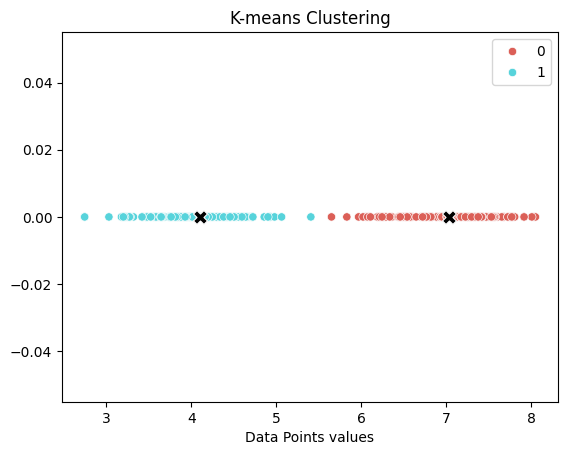

In [19]:

# Draw the cluster plot
PlotKmeans(data, De_centeriod, labels)


## Test Case 2

- Number of clusters = 3
- Number of points = 100 


In [42]:

# Generate dataset with 150 samples, mean of 7 and 3, standard deviation of 0.5 and seed 64
data = CreateDataSet(100, 6, 3, 0.5 , rand=64)
# data


In [43]:

# Scale the data to a range of 0 to ( 3.14 )
s_data = ScaleData(data ,3.14)
# s_data

In [44]:

# Compute the K-means clustering with 3 clusters, 100 iterations and seed 16
centeriod, labels = Kmeans(s_data, 3, 100, r=16)
# labels

In [45]:

# De-Scale the data to the original range
De_centeriod = DeScaleData(centeriod, data, 3.14 )

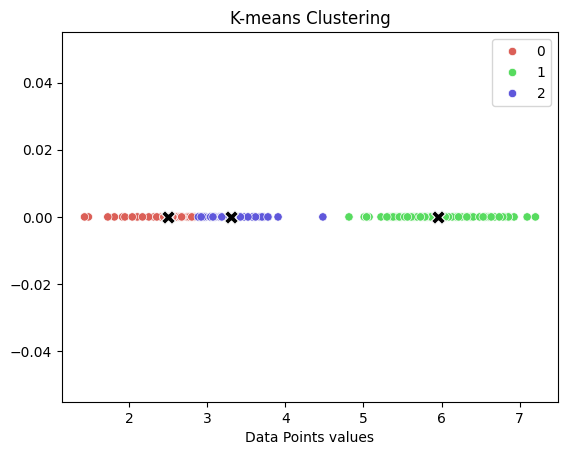

In [46]:

# Draw the cluster plot
PlotKmeans(data, De_centeriod, labels)


In [49]:
predict(np.array([2,3.5,5.5,6.5]), De_centeriod)

Point 2.0 is in cluster 0
Point 3.5 is in cluster 2
Point 5.5 is in cluster 1
Point 6.5 is in cluster 1


C:\Users\AHMED OSAMA\AppData\Local\Temp\ipykernel_11208\2608492390.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rx = RYGate(float(i)).to_matrix()


array([0, 2, 1, 1], dtype=int64)

## Test Case 3

- Number of clusters = 2
- Number of points = 150 
- Split .2 to test 


In [25]:

# Generate dataset with 150 samples, mean of 7 and 4, standard deviation of 0.5 and seed 20
data = CreateDataSet(150, 7, 4, 0.5,rand=20)
# data


In [26]:
# split the data into two parts
data_1, data_2 = Kmeans_split(data, 0.8)
# data_1
# data_2

In [33]:
data_2

array([3.61296258, 3.4645388 , 3.68653133, 3.46131843, 4.63848992,
       4.17323067, 3.93884203, 4.10958479, 4.07173354, 4.71742238,
       4.5276822 , 4.55764647, 4.9005032 , 3.90279059, 3.57890648,
       3.42591266, 3.58422803, 3.6636267 , 4.33505823, 3.42556366,
       3.8660463 , 3.52421869, 3.21496568, 4.49299005, 4.46198908,
       3.19930957, 3.85161233, 4.59468395, 3.83334954, 4.46418099,
       3.63888079, 5.06085643, 3.65418791, 4.19776915, 3.81404606,
       3.48029133, 4.24592029, 4.50185429, 3.86721312, 3.47970345,
       3.91784936, 4.19703126, 3.88416009, 3.87618705, 3.80668385,
       4.0114509 , 3.64372794, 4.1617608 , 3.52065671, 3.83316766,
       3.41846695, 4.37988769, 4.45487834, 4.7232608 , 3.81157076,
       3.93576287, 3.76123366, 3.93889876, 4.1038275 , 3.92536705])

In [27]:

# Scale the data to a range of 0 to ( 3.14 /2 ) the default upper limit
s_data_1 = ScaleData(data_1)
# s_data

s_data_2 = ScaleData(data_2)

In [28]:

# Compute the K-means clustering with 2 clusters, 100 iterations and seed 42 (default value)
centeriod, labels = Kmeans(s_data_1, 2, 100, r=42)
# labels

In [29]:
# De-Scale the data to the original range
De_centeriod = DeScaleData(centeriod,data)

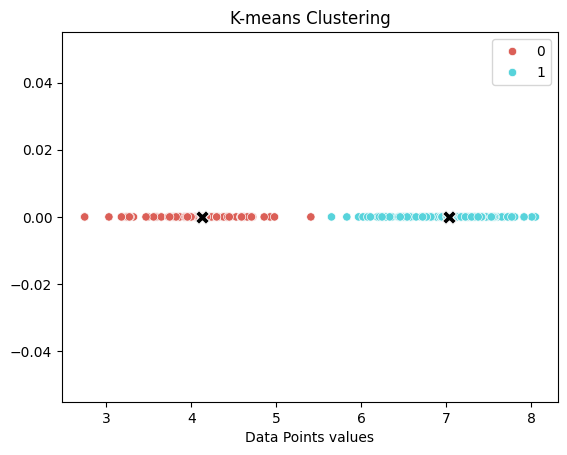

In [30]:

# Draw the cluster plot
PlotKmeans(data_1, De_centeriod, labels)


In [31]:
#prediction
test_labels=predict(data_2, De_centeriod)
test_labels

C:\Users\AHMED OSAMA\AppData\Local\Temp\ipykernel_11208\2608492390.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rx = RYGate(float(i)).to_matrix()


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)